In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [ ]:
# Cargar el dataset Wine
data = load_wine()
X = data.data
y = data.target

feature_names = data.feature_names  # Nombres de las características

# Convertir a DataFrame para facilitar la manipulación
df = pd.DataFrame(X, columns=feature_names)
df['Clase de Vino'] = y

# Mostrar las primeras filas del DataFrame
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Clase de Vino  
0   

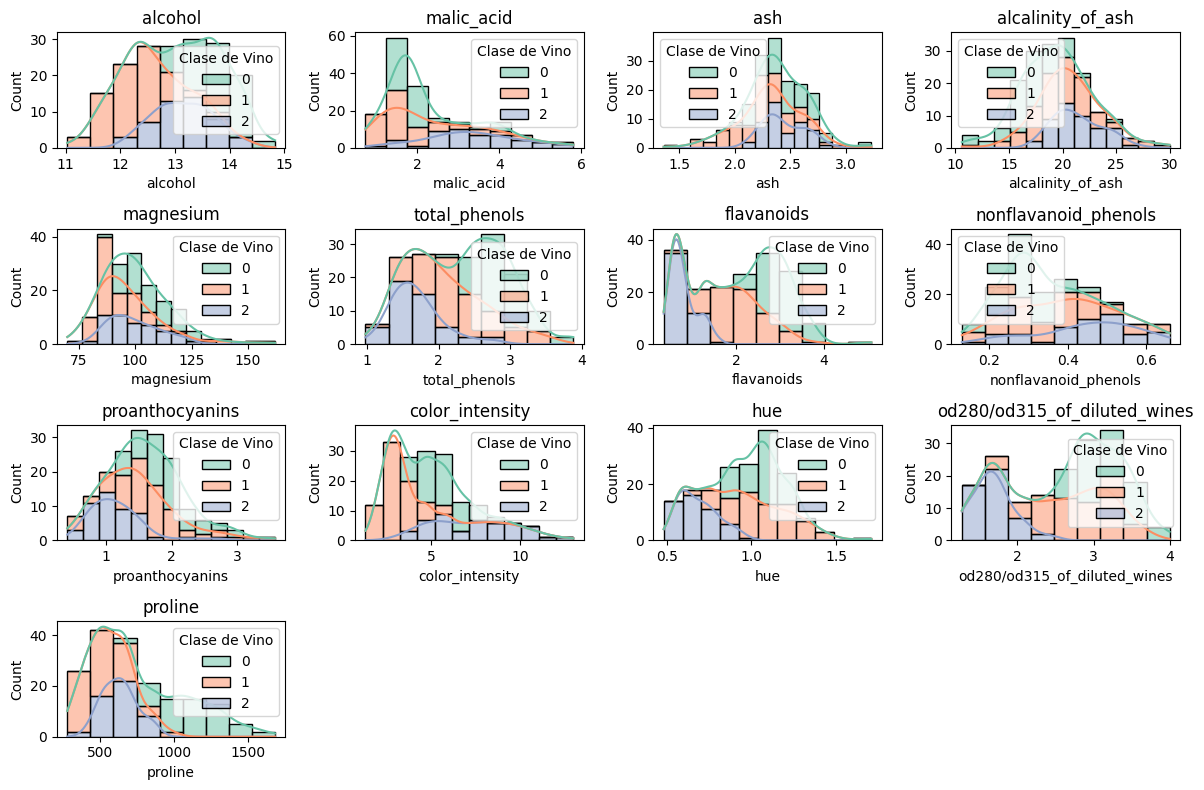

In [ ]:
# Graficar las distribuciones de las características para cada clase de vino
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=feature, hue='Clase de Vino', multiple="stack", palette="Set2", kde=True)
    plt.title(feature)
    plt.tight_layout()

plt.show()

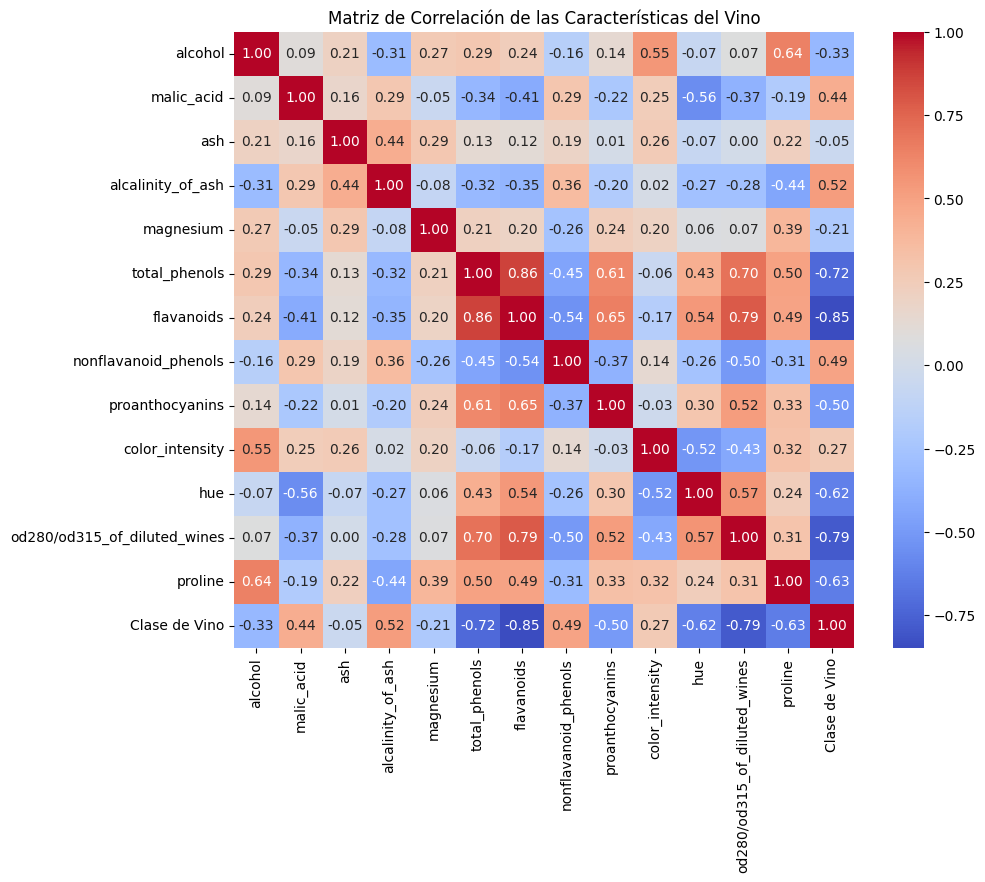

In [ ]:
# Crear un mapa de calor para ver la correlación entre las características
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de las Características del Vino')
plt.show()

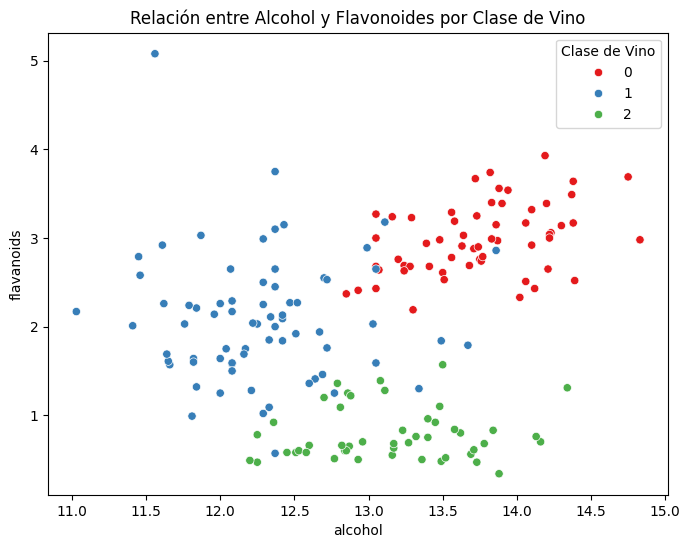

In [ ]:
# Graficar el par de características más correlacionadas (para ilustrar una relación)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='flavanoids', hue='Clase de Vino', palette='Set1')
plt.title('Relación entre Alcohol y Flavonoides por Clase de Vino')
plt.show()

<ipython-input-7-4ba6d50dee2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Clase de Vino', data=df, palette='Set2')


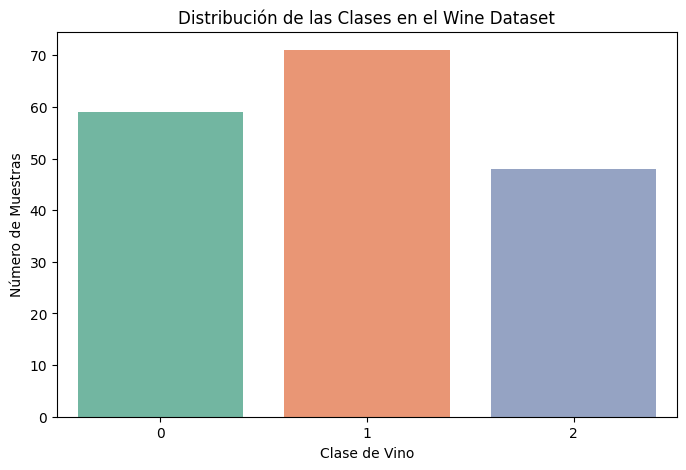

In [ ]:
# Graficar la distribución de las clases usando un gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='Clase de Vino', data=df, palette='Set2')
plt.title('Distribución de las Clases en el Wine Dataset')
plt.xlabel('Clase de Vino')
plt.ylabel('Número de Muestras')
plt.show()

plt.show()

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características (scaling)
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# One-hot encoding de las etiquetas
y_train_ohe = to_categorical(y_train, num_classes=3)
y_test_ohe = to_categorical(y_test, num_classes=3)

# Crear el modelo de red neuronal multicapa (MLP)
#64,64
model = Sequential([
    Dense(32, activation='tanh', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),  # Capa oculta con 64 neuronas
    Dense(16, activation='tanh', kernel_regularizer=l2(0.01)),  # Otra capa oculta con 64 neuronas
    Dense(3, activation='softmax')  # Capa de salida para clasificación multiclase (3 clases)
])

# Compilar el modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
'''
history = model.fit(X_train, y_train_ohe,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_test, y_test_ohe),
                    verbose=1)
'''

history = model.fit(X_train, y_train_ohe,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=1)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_ohe, verbose=0)
print(f"Exactitud en el conjunto de prueba: {test_acc:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3384 - loss: 1.6243 - val_accuracy: 0.4400 - val_loss: 1.4541
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4660 - loss: 1.3874 - val_accuracy: 0.5600 - val_loss: 1.3828
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5797 - loss: 1.3378 - val_accuracy: 0.6000 - val_loss: 1.3394
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5436 - loss: 1.2912 - val_accuracy: 0.6000 - val_loss: 1.3316
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5721 - loss: 1.2601 - val_accuracy: 0.4800 - val_loss: 1.3392
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5946 - loss: 1.2129 - val_accuracy: 0.5200 - val_loss: 1.3013
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5671 - loss: 1.1980 - val_accuracy: 0.6000 - val_loss: 1.2754
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6435 - loss: 1.1560 - val_accuracy: 0.6000 - val_loss: 1.2

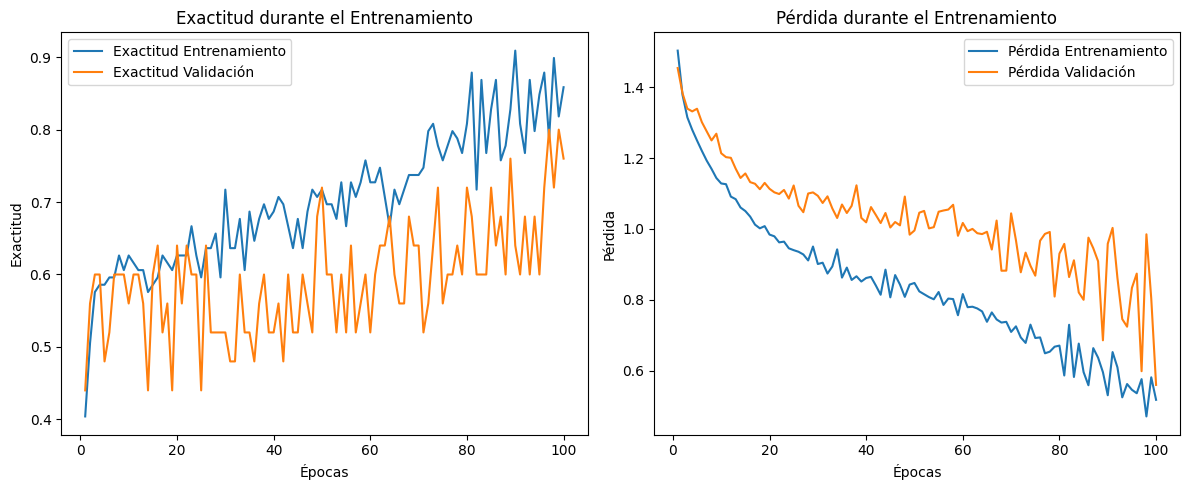

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Salidas predichas [[0.6637314  0.1572682  0.17900045]
 [0.5972608  0.2156313  0.18710792]
 [0.03303063 0.12482255 0.8421468 ]
 [0.94545525 0.0472961  0.0072486 ]
 [0.06793103 0.5320532  0.40001574]
 [0.9627209  0.03074105 0.00653821]
 [0.15902154 0.5083891  0.33258945]
 [0.05223054 0.07646235 0.87130713]
 [0.3621412  0.5073974  0.1304614 ]
 [0.105106   0.18813433 0.70675975]
 [0.45115575 0.42384037 0.12500395]
 [0.01584163 0.8407648  0.14339344]
 [0.94478196 0.04561264 0.00960542]
 [0.01481771 0.7658694  0.2193128 ]
 [0.97090226 0.02370951 0.0053882 ]
 [0.00970461 0.95345324 0.03684222]
 [0.00887925 0.94835407 0.04276671]
 [0.12740684 0.5694041  0.30318916]
 [0.9632741  0.03047058 0.00625527]
 [0.00591227 0.95625746 0.03783032]
 [0.9537113  0.03931617 0.00697259]
 [0.29953977 0.5266386  0.17382161]
 [0.34216812 0.14861815 0.50921375]
 [0.0075885  0.08184795 0.9105636 ]
 [0.00681388 0.09100365 0.90218246]
 [0.03211429 0.06832307 0.89956266]
 [0.0127

In [ ]:
# Graficar la exactitud y pérdida de entrenamiento/validación
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Gráfico de la exactitud
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Exactitud Entrenamiento')
plt.plot(epochs, history.history['val_accuracy'], label='Exactitud Validación')
plt.title('Exactitud durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

# Gráfico de la pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(epochs, history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

#Predict test data
y_pred = model.predict(X_test)
print("Salidas predichas", y_pred)
#Print actual and predicted value
actual = np.argmax(y_test_ohe,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

datos reales [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2]
datos predichos [0 0 2 0 1 0 1 2 1 2 0 1 0 1 0 1 1 1 0 1 0 1 2 2 2 2 1 0 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 2 2 0 0 1 2 0 1 0 0 2]
[[19  0  0]
 [ 2 17  2]
 [ 0  1 13]]


Text(0.5, 0, 'Predicted label')

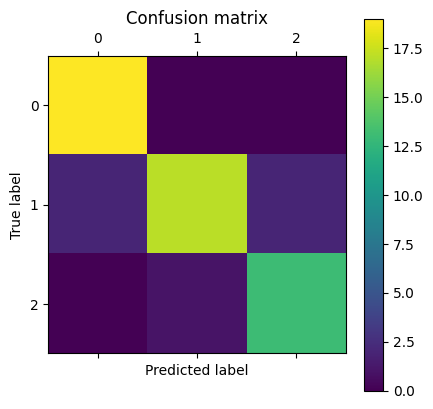

In [ ]:
#--------matrix confusion-----

# Compute confusion matrix
print("datos reales", y_test)
print("datos predichos", predicted)
#cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(actual, predicted)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#------metricas------
n_classes = 3
y_true = actual
# Binarizar las etiquetas para ROC AUC
y_true_bin = y_test_ohe
# Calcular Precision, Recall, F1-Score y Accuracy para el problema multiclase
precision_macro = precision_score(y_true, predicted, average='macro')
recall_macro = recall_score(y_true, predicted, average='macro')
f1_macro = f1_score(y_true, predicted, average='macro')
accuracy = accuracy_score(y_true, predicted)

# Calcular AUC (Area Under the Curve) para cada clase
auc = roc_auc_score(y_true_bin, y_pred, multi_class="ovr")

# Mostrar las métricas
print(f'Precisión (Macro): {precision_macro:.2f}')
print(f'Recall (Macro): {recall_macro:.2f}')
print(f'F1-Score (Macro): {f1_macro:.2f}')
print(f'Exactitud (Accuracy): {accuracy:.2f}')
print(f'AUC (OvR): {auc:.2f}')

# Calcular métricas clase por clase
for i in range(n_classes):
    print(f"\nMétricas para la clase {i}:")

    # Convertir la clase actual en un problema binario (One vs Rest)
    y_true_binary = (y_true == i).astype(int)  # 1 para la clase actual, 0 para el resto
    y_pred_binary = (predicted == i).astype(int)  # Predicciones convertidas a binario

    # Calcular precisión, recall, f1-score y accuracy para la clase actual
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    accuracy = accuracy_score(y_true_binary, y_pred_binary)

    # Mostrar las métricas
    print(f'Precisión: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print(f'Exactitud (Accuracy): {accuracy:.2f}')
    print(f'AUC: {auc:.2f}')

Precisión (Macro): 0.91
Recall (Macro): 0.91
F1-Score (Macro): 0.91
Exactitud (Accuracy): 0.91
AUC (OvR): 0.98

Métricas para la clase 0:
Precisión: 0.90
Recall: 1.00
F1-Score: 0.95
Exactitud (Accuracy): 0.96
AUC: 0.98

Métricas para la clase 1:
Precisión: 0.94
Recall: 0.81
F1-Score: 0.87
Exactitud (Accuracy): 0.91
AUC: 0.98

Métricas para la clase 2:
Precisión: 0.87
Recall: 0.93
F1-Score: 0.90
Exactitud (Accuracy): 0.94
AUC: 0.98


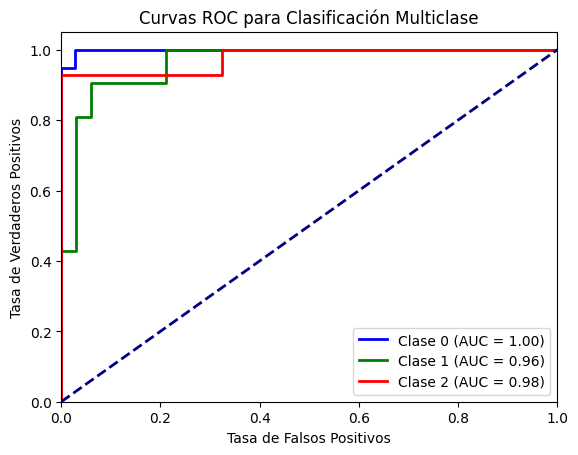

In [ ]:
# Calcular ROC curve para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred[:, i])

# Graficar las curvas ROC para cada clase
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para Clasificación Multiclase')
plt.legend(loc="lower right")
plt.show()